Step 1: Import Required Libraries


In [1]:
!pip install tensorflow

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from sklearn.model_selection import train_test_split

Step 2: Load and Preprocess the Data

In [3]:
# Load your dataset

data = pd.read_csv('/kaggle/input/students-score-dataset-linear-regression/student_scores.csv')
X = data['Hours'].values.reshape(-1, 1)   # Feature
y = data['Scores'].values.reshape(-1, 1)  # Target

In [4]:
X = X / np.max(X)
y = y / np.max(y)

Step 3: Define Activation Functions and Plot Them

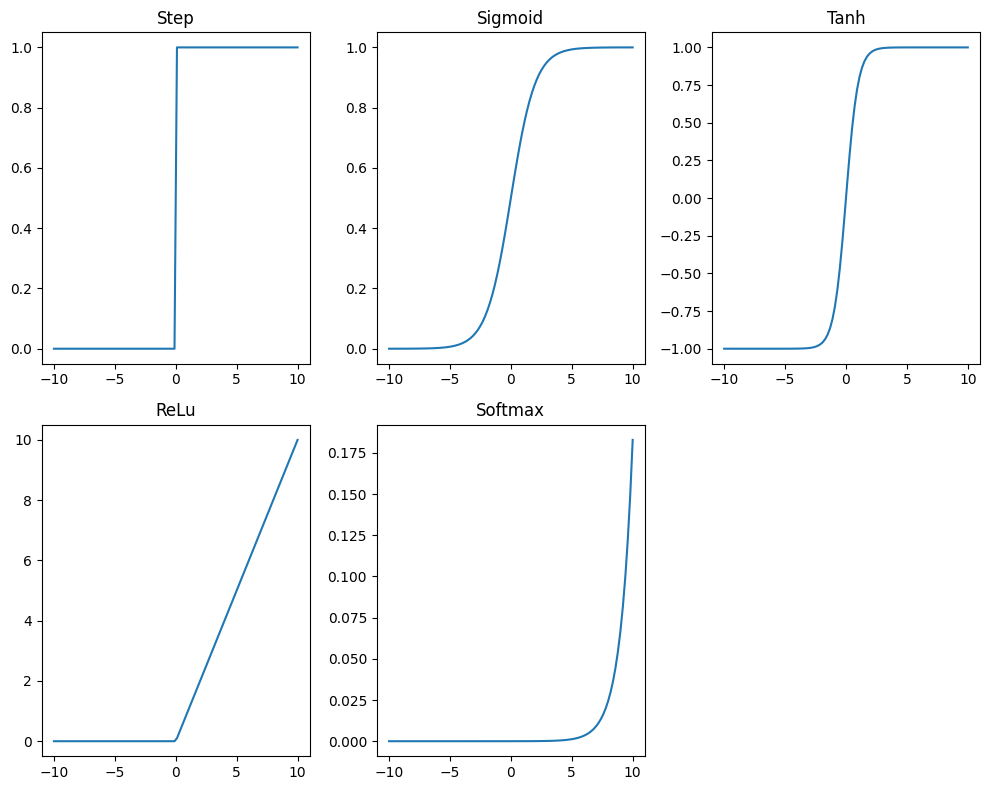

In [5]:
x = np.linspace(-10, 10, 100)

#Activation functions 
def step(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1/ (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

#Plotting
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.plot(x, step(x))
plt.title('Step')

plt.subplot(2, 3, 2)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')

plt.subplot(2, 3, 3)
plt.plot(x, tanh(x))
plt.title('Tanh')

plt.subplot(2, 3, 4)
plt.plot(x, relu(x))
plt.title('ReLu')

plt.subplot(2, 3, 5)
plt.plot(x, softmax(x))
plt.title('Softmax')

plt.tight_layout()
plt.show()

Step 4: Initialize Weights, Bias, and Hyperparameters

In [6]:
# Initialize weight and bias randomly
np.random.seed(42)  # reproducibility
w = np.random.randn()
b = 0

# Hyperparameters
learning_rate = 0.01
epochs = 1000

print(f"Initial weight: {w:.4f}, Initial bias: {b}")

Initial weight: 0.4967, Initial bias: 0


Step 5: Forward Propagation

In [7]:
# Convert X and y to numpy arrays
X_np = data['Hours'].values
y_np = data['Scores'].values

# Forward Propagation
def predict(X, w, b):
    return w * X + b

def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initial prediction and loss
y_pred = predict(X_np, w, b)
initial_loss = compute_loss(y_np, y_pred)

print(f"Initial Loss: {initial_loss:.4f}")

Initial Loss: 2955.9808


In [8]:
#Backward Propagation
def compute_gradients(X, y, y_pred):
    n = len(y)
    dw = (-2/n) * np.sum((y - y_pred) * X)
    db = (-2/n) * np.sum(y - y_pred)
    return dw, db

dw, db = compute_gradients(X_np, y_np, y_pred)

print(f"Gradient w.r.t weight: {dw:.4f}")
print(f"Gradient w.r.t bias: {db:.4f}")

Gradient w.r.t weight: -604.6761
Gradient w.r.t bias: -97.9809


In [11]:
import tensorflow as tf

# Initialize weight and bias as TensorFlow variables
w = tf.Variable(0.4967, dtype=tf.float32)  # you can choose any initial value
b = tf.Variable(0.0, dtype=tf.float32)

learning_rate = 0.01

# Simulated gradients (example values)
dw = tf.constant(-604.6761, dtype=tf.float32)
db = tf.constant(-97.9809, dtype=tf.float32)

# Update step using TensorFlow
w.assign_sub(learning_rate * dw)
b.assign_sub(learning_rate * db)

print(f"✅ Updated weight: {w.numpy():.4f}, Updated bias: {b.numpy():.4f}")

✅ Updated weight: 6.5435, Updated bias: 0.9798


I0000 00:00:1744617274.552715      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744617274.553429      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [12]:
X = tf.constant(data['Hours'].values, dtype=tf.float32)
y = tf.constant(data['Scores'].values, dtype=tf.float32)

In [13]:
#Training loop
epochs = 1000

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        y_pred = w * X + b
        loss = tf.reduce_mean(tf.square(y - y_pred))  # Mean Squared Error

    # Backward pass - compute gradients
    dw, db = tape.gradient(loss, [w, b])

    # Update weights
    w.assign_sub(learning_rate * dw)
    b.assign_sub(learning_rate * db)

    # Print details every 100 epochs
    if epoch % 100 == 0:
        print(f"\nEpoch {epoch}")
        print(f"  Loss: {loss.numpy():.4f}")
        print(f"  Gradient w.r.t weight: {dw.numpy():.4f}")
        print(f"  Gradient w.r.t bias: {db.numpy():.4f}")
        print(f"  Updated weight: {w.numpy():.4f}")
        print(f"  Updated bias: {b.numpy():.4f}")


Epoch 0
  Loss: 406.2804
  Gradient w.r.t weight: -217.0393
  Gradient w.r.t bias: -35.4087
  Updated weight: 8.7139
  Updated bias: 1.3339

Epoch 100
  Loss: 28.9662
  Gradient w.r.t weight: 0.0402
  Gradient w.r.t bias: -0.2494
  Updated weight: 9.8808
  Updated bias: 1.8334

Epoch 200
  Loss: 28.9216
  Gradient w.r.t weight: 0.0275
  Gradient w.r.t bias: -0.1701
  Updated weight: 9.8474
  Updated bias: 2.0401

Epoch 300
  Loss: 28.9008
  Gradient w.r.t weight: 0.0187
  Gradient w.r.t bias: -0.1160
  Updated weight: 9.8246
  Updated bias: 2.1812

Epoch 400
  Loss: 28.8911
  Gradient w.r.t weight: 0.0128
  Gradient w.r.t bias: -0.0791
  Updated weight: 9.8091
  Updated bias: 2.2774

Epoch 500
  Loss: 28.8866
  Gradient w.r.t weight: 0.0087
  Gradient w.r.t bias: -0.0539
  Updated weight: 9.7985
  Updated bias: 2.3430

Epoch 600
  Loss: 28.8845
  Gradient w.r.t weight: 0.0059
  Gradient w.r.t bias: -0.0368
  Updated weight: 9.7913
  Updated bias: 2.3877

Epoch 700
  Loss: 28.8836
  Gr


Epoch 0
  Loss: 28.8828
  Gradient w.r.t weight: 0.0013
  Gradient w.r.t bias: -0.0080
  Updated weight: 9.7792
  Updated bias: 2.4629

Epoch 100
  Loss: 28.8828
  Gradient w.r.t weight: 0.0009
  Gradient w.r.t bias: -0.0054
  Updated weight: 9.7781
  Updated bias: 2.4695

Epoch 200
  Loss: 28.8828
  Gradient w.r.t weight: 0.0006
  Gradient w.r.t bias: -0.0037
  Updated weight: 9.7774
  Updated bias: 2.4740

Epoch 300
  Loss: 28.8827
  Gradient w.r.t weight: 0.0004
  Gradient w.r.t bias: -0.0025
  Updated weight: 9.7769
  Updated bias: 2.4771

Epoch 400
  Loss: 28.8827
  Gradient w.r.t weight: 0.0003
  Gradient w.r.t bias: -0.0017
  Updated weight: 9.7765
  Updated bias: 2.4792

Epoch 500
  Loss: 28.8827
  Gradient w.r.t weight: 0.0002
  Gradient w.r.t bias: -0.0012
  Updated weight: 9.7763
  Updated bias: 2.4806

Epoch 600
  Loss: 28.8827
  Gradient w.r.t weight: 0.0001
  Gradient w.r.t bias: -0.0008
  Updated weight: 9.7761
  Updated bias: 2.4816

Epoch 700
  Loss: 28.8827
  Gradien

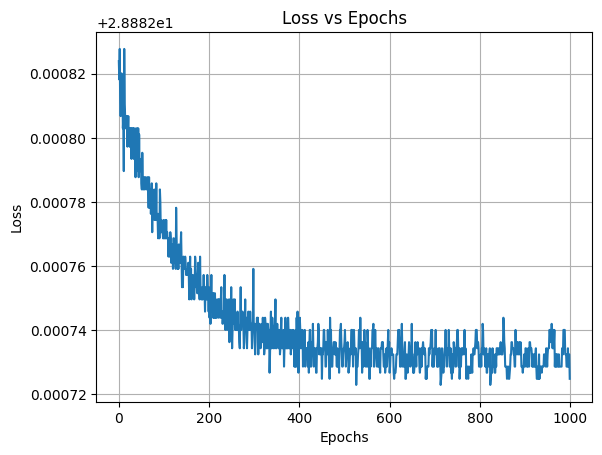

In [14]:
# Initialize a list to store loss values for plotting
loss_values = []

# Start training loop
epochs = 1000
learning_rate = 0.01

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        y_pred = w * X + b
        loss = tf.reduce_mean(tf.square(y - y_pred))  # Mean Squared Error

    # Backward pass - compute gradients
    dw, db = tape.gradient(loss, [w, b])

    # Update weights
    w.assign_sub(learning_rate * dw)
    b.assign_sub(learning_rate * db)

    # Store the loss for plotting
    loss_values.append(loss.numpy())

    # Print details every 100 epochs
    if epoch % 100 == 0:
        print(f"\nEpoch {epoch}")
        print(f"  Loss: {loss.numpy():.4f}")
        print(f"  Gradient w.r.t weight: {dw.numpy():.4f}")
        print(f"  Gradient w.r.t bias: {db.numpy():.4f}")
        print(f"  Updated weight: {w.numpy():.4f}")
        print(f"  Updated bias: {b.numpy():.4f}")

# Plotting Loss vs Epochs
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid(True)
plt.show()


Epoch 0
  Loss: 2955.9893
  Learning Rate: 0.010000
  Gradient w.r.t weight: -604.6770
  Gradient w.r.t bias: -97.9811
  Updated weight: 0.5067
  Updated bias: 0.0100

Epoch 100
  Loss: 2295.5969
  Learning Rate: 0.009600
  Gradient w.r.t weight: -532.1707
  Gradient w.r.t bias: -85.9571
  Updated weight: 1.5063
  Updated bias: 1.0096

Epoch 200
  Loss: 1741.1464
  Learning Rate: 0.009216
  Gradient w.r.t weight: -462.5646
  Gradient w.r.t bias: -74.4140
  Updated weight: 2.4659
  Updated bias: 1.9692

Epoch 300
  Loss: 1282.1614
  Learning Rate: 0.008847
  Gradient w.r.t weight: -395.7422
  Gradient w.r.t bias: -63.3327
  Updated weight: 3.3872
  Updated bias: 2.8905

Epoch 400
  Loss: 909.0828
  Learning Rate: 0.008493
  Gradient w.r.t weight: -331.5927
  Gradient w.r.t bias: -52.6945
  Updated weight: 4.2715
  Updated bias: 3.7749

Epoch 500
  Loss: 613.1807
  Learning Rate: 0.008154
  Gradient w.r.t weight: -270.0099
  Gradient w.r.t bias: -42.4820
  Updated weight: 5.1205
  Updat

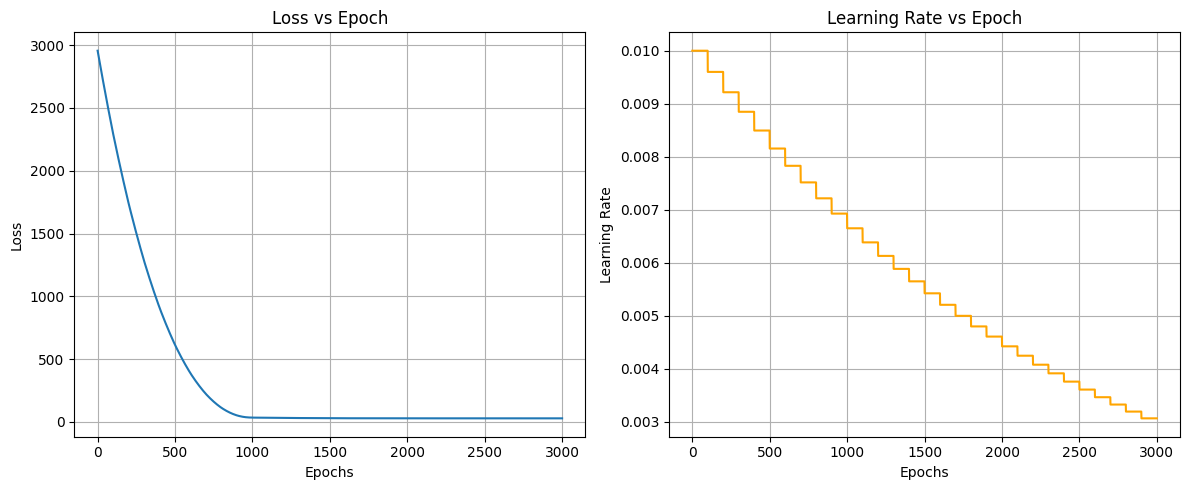

In [18]:
# Initialize weight and bias as TensorFlow variables
w = tf.Variable(0.4967, dtype=tf.float32)  # you can choose any initial value
b = tf.Variable(0.0, dtype=tf.float32)

# Set initial learning rate, decay rate, and decay steps
initial_learning_rate = 0.01  # Reduce the initial learning rate
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True
)

epochs = 3000

# Lists to store loss and learning rate values for visualization
losses = []
learning_rates = []

# Training loop
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        y_pred = w * X + b
        loss = tf.reduce_mean(tf.square(y - y_pred))  # Mean Squared Error

    # Backward pass - compute gradients
    dw, db = tape.gradient(loss, [w, b])

    # Clip gradients to prevent extreme values
    clipped_dw = tf.clip_by_value(dw, -1.0, 1.0)
    clipped_db = tf.clip_by_value(db, -1.0, 1.0)

    # Update weights with learning rate adjustment
    learning_rate = learning_rate_schedule(epoch)
    w.assign_sub(learning_rate * clipped_dw)
    b.assign_sub(learning_rate * clipped_db)

    # Store loss and learning rate for visualization
    losses.append(loss.numpy())
    learning_rates.append(learning_rate.numpy())

    # Print details every 100 epochs
    if epoch % 100 == 0:
        print(f"\nEpoch {epoch}")
        print(f"  Loss: {loss.numpy():.4f}")
        print(f"  Learning Rate: {learning_rate.numpy():.6f}")
        print(f"  Gradient w.r.t weight: {dw.numpy():.4f}")
        print(f"  Gradient w.r.t bias: {db.numpy():.4f}")
        print(f"  Updated weight: {w.numpy():.4f}")
        print(f"  Updated bias: {b.numpy():.4f}")

# After training, plot the loss and learning rate over epochs
plt.figure(figsize=(12, 5))

# Plot Loss vs Epoch
plt.subplot(1, 2, 1)
plt.plot(range(epochs), losses, label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)

# Plot Learning Rate vs Epoch
plt.subplot(1, 2, 2)
plt.plot(range(epochs), learning_rates, label="Learning Rate", color='orange')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate vs Epoch')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

In [27]:
# Example: Assuming your data is in 'X' and 'y' variables
X = data['Hours']
y = data['Scores']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Convert X_train to a numpy array and reshape it
X_train = X_train.values.reshape(-1, 1)

# Now you can use the reshaped X_train in your model
print("Reshaped X_train shape:", X_train.shape)

Reshaped X_train shape: (20, 1)


In [35]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Input  # <- Added Input here
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ensure input shape is (samples, features)
if len(X_train.shape) == 1:
    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)

# Function to create a model with a given activation
def create_model(activation_function):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Input layer

    if activation_function == "LeakyReLU":
        model.add(Dense(64))
        model.add(LeakyReLU(alpha=0.1))
        model.add(Dense(32))
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Dense(64, activation=activation_function))
        model.add(Dense(32, activation=activation_function))
    
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Activation functions to test
activations = ["relu", "tanh", "sigmoid", "linear", "LeakyReLU"]

results = {}

for activation in activations:
    model = create_model(activation)
    history = model.fit(X_train, y_train, epochs=3000, verbose=0, validation_split=0.2)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[activation] = {"MSE": mse, "RMSE": rmse, "R2": r2}
    print(f"\nActivation: {activation}")
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

Activation: relu
MSE: 17.7534, RMSE: 4.2135, R2: 0.9698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step

Activation: tanh
MSE: 68.5523, RMSE: 8.2796, R2: 0.8835
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step

Activation: sigmoid
MSE: 349.8044, RMSE: 18.7031, R2: 0.4055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

Activation: linear
MSE: 17.7524, RMSE: 4.2134, R2: 0.9698


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step

Activation: LeakyReLU
MSE: 17.7604, RMSE: 4.2143, R2: 0.9698


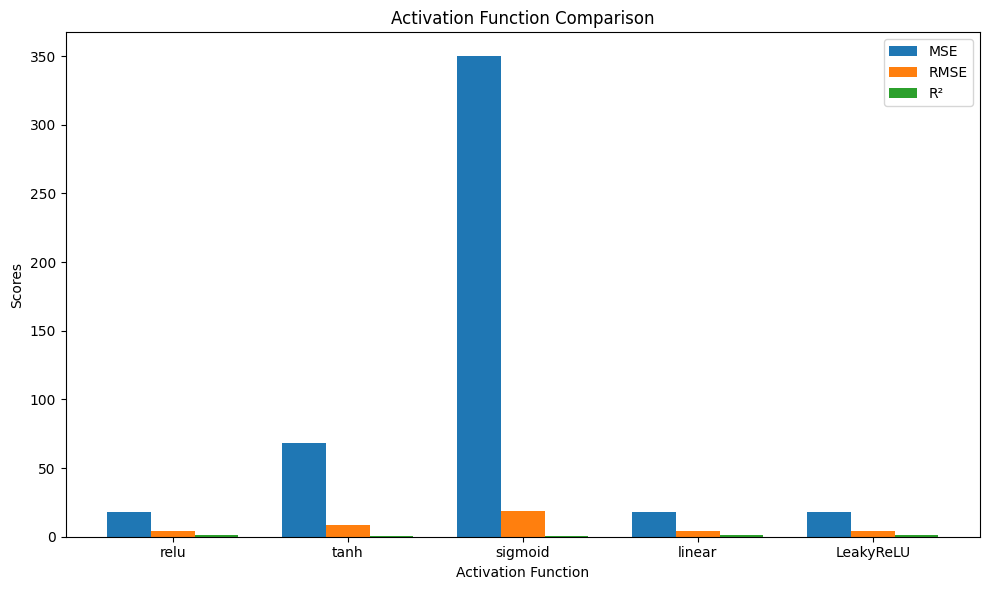

In [36]:
# Assuming this dictionary is filled after evaluation
results = {
    "relu": {"mse": 17.7534, "rmse": 4.2135, "r2": 0.9698},
    "tanh": {"mse": 68.5523, "rmse": 8.2796, "r2": 0.8835},
    "sigmoid": {"mse": 349.8044, "rmse": 18.7031, "r2": 0.4055},
    "linear": {"mse": 17.7524, "rmse": 4.2134, "r2": 0.9698},
    "LeakyReLU": {"mse": 17.7604, "rmse": 4.2143, "r2": 0.9698}
}

activations = list(results.keys())
mse = [results[act]['mse'] for act in activations]
rmse = [results[act]['rmse'] for act in activations]
r2 = [results[act]['r2'] for act in activations]

x = np.arange(len(activations))
width = 0.25

fig, ax1 = plt.subplots(figsize=(10, 6))

bar1 = ax1.bar(x - width, mse, width, label='MSE')
bar2 = ax1.bar(x, rmse, width, label='RMSE')
bar3 = ax1.bar(x + width, r2, width, label='R²')

ax1.set_xlabel('Activation Function')
ax1.set_ylabel('Scores')
ax1.set_title('Activation Function Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(activations)
ax1.legend()

plt.tight_layout()
plt.show()